In [7]:
import pickle
import spacy
import scattertext as st
import re

import spacy
#from spacy import displacy
#from spacy.symbols import amod
from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

import pyLDAvis
import pyLDAvis.sklearn

import pandas as pd
import numpy as np

import swat
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
#nltk.download()
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

/Users/elena/opt/anaconda3/envs/metis/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
/Users/elena/opt/anaconda3/envs/metis/lib/python3.7/site-packages/nltk/lm/counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence, defaultdict
/Users/elena/opt/anaconda3/envs/metis/lib/python3.7/site-packages/nltk/lm/vocabulary.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Counter, Iterable


# Look for Start here!!!!

In [124]:
with open('blogger_com_data_330677_7_clean.pkl', 'rb') as picklefile:
    df = pickle.load(picklefile)

In [125]:
df

,date,blogger_id,gender,age,occupation,name,post
0,"19,August,2004",4162441,male,16,Student,Sagittarius,DESTINY... you might not say a...
13,"19,August,2004",4157968,male,16,Student,Pisces,"As I strolled into the mall yesterday,..."
17,"19,August,2004",4278694,female,24,Technology,Virgo,I've never really had a blog bef...
69,"19,August,2004",4261114,female,40,indUnk,Gemini,I love to read novels. I l...
79,"19,August,2004",4215047,male,17,Student,Aquarius,today.. really a very sad day...
...,...,...,...,...,...,...,...
50463676,"12,February,1999",2999514,male,27,Engineering,Pisces,[detail] Propog...
50482996,"01,April,1999",2999514,male,27,Engineering,Pisces,[detail] I actually...
50502316,"05,June,1999",2999514,male,27,Engineering,Pisces,[detail] A tria...
50521636,"16,December,1999",2999514,male,27,Engineering,Pisces,[detail] Points...


In [48]:
df.shape

(330677, 7)

In [79]:
df_toy.tail(30)

,date,blogger_id,gender,age,occupation,name,post,polarity_pos_posts,polarity_neu_post,polarity_compound_post,polarity_neg_post
330411,"14,June,2004",3410894,male,15,Student,Sagittarius,as bore dumb summer sets even begins har...,0.272,0.506,0.2732,0.222
330412,"14,June,2004",3579245,female,15,Education,Capricorn,my dramatic death suicide know ...,0.188,0.669,0.6746,0.142
330423,"14,June,2004",3633935,female,17,indUnk,Libra,hey hows things finally got round set...,0.232,0.617,0.7906,0.151
330427,"14,June,2004",619960,male,37,Communications-Media,Libra,ever visit postmodern emerging community faith...,0.225,0.756,0.9998,0.020
330430,"14,June,2004",3488227,male,23,Engineering,Cancer,enough already week week much s...,0.201,0.742,0.9977,0.058
330444,"14,June,2004",3460990,female,27,Education,Aquarius,when turned computer work morning opened int...,0.108,0.736,-0.2960,0.156
330447,"14,June,2004",3475833,male,15,Student,Leo,yee haw here monday woo hoo great...,0.274,0.642,0.9968,0.083
330448,"14,June,2004",3399714,male,24,Military,Gemini,at lunch today cpt two translators one l...,0.327,0.591,0.9565,0.083
330475,"14,June,2004",2787343,male,14,Education,Leo,this must household joke year somehow plas...,0.107,0.680,-0.8323,0.213
330499,"14,June,2004",2289155,male,17,indUnk,Cancer,alrighty dug screenshots found nice picture ...,0.102,0.821,0.2732,0.078


In [95]:
df_toy = df.iloc[:330677,:]

In [87]:
# #englishStemmer=SnowballStemmer("english", ignore_stopwords=True)
# def stemComment(comment_line):
#     token_words=word_tokenize(comment_line)
#     stem_line=[]
#     for word in token_words:
#         stem_line.append(englishStemmer.stem(word))
#         stem_line.append(" ")
#     return "".join(stem_line)

In [88]:
stop_words = set(stopwords.words('english'))

def remove_stop_words(comment_line):
    token_words=word_tokenize(str(comment_line))
    filtered_comment_line = [w for w in token_words if not w in stop_words] 
    
    return " ".join(filtered_comment_line)

In [89]:
alphanumeric = lambda x: re.sub(r'\b[0-9]+\b\W*', '', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
#re.sub(r'\b[0-9]+\b\W*', '', text)

In [90]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma_series(string):
    return lemmatizer.lemmatize(string)

In [91]:
#lemma_series('aardwolves')

In [97]:
df_toy['post'] = df_toy['post'].map(remove_stop_words).map(alphanumeric).map(punc_lower)

In [98]:
df_toy['post'] = df_toy['post'].map(lemma_series)

In [99]:
my_stop_words_lst = ['[detail]', 'so', 's', 'it', 'he', 'its', 'she', 'we', 'n', 'm', 've']

for w in my_stop_words_lst:
    pattern = r'\b'+w+r'\b'
    custom_stop = lambda x: re.sub(pattern, ' ', x)
    df_toy['post'] = df_toy['post'].map(custom_stop)

In [100]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [101]:
analyser = SentimentIntensityAnalyzer()
def extract_polarity(text, polarity_type = 'compound'):
    all_val = analyser.polarity_scores(text)
    return all_val[polarity_type]

In [102]:
df_toy['polarity_neg_post'] = df_toy['post'].apply(extract_polarity, polarity_type = 'neg')
df_toy['polarity_pos_posts'] = df_toy['post'].apply(extract_polarity, polarity_type = 'pos')
df_toy['polarity_neu_post'] = df_toy['post'].apply(extract_polarity, polarity_type = 'neu')
df_toy['polarity_compound_post'] = df_toy['post'].apply(extract_polarity)

In [104]:
df_toy.shape

(330677, 11)

In [105]:
with open('blogger_com_data_330677_11_clean_sentiment.pkl', 'wb') as picklefile:
    pickle.dump(df_toy,picklefile)

In [ ]:
###########################################

In [5]:
with open('../../data/blogger_com_data_330677_11_clean_sentiment_v_pl_normalized.pkl', 'rb') as picklefile:
    df_toy = pickle.load(picklefile)

In [6]:
df_toy.head()

,date,blogger_id,gender,age,occupation,name,post,polarity_neg_post,polarity_pos_posts,polarity_neu_post,...,trust,fear,negative,sadness,anger,surprise,positive,disgust,joy,anticipation
0,2004-08-19,4162441,male,16,Student,Sagittarius,destiny might say anything hear chosen life pa...,0.000,0.496,0.504,...,0.000605,0.000302,0.000302,0.000302,0.000000,0.000302,0.003024,0.000000,0.001814,0.000605
13,2004-08-19,4157968,male,16,Student,Pisces,strolled mall yesterday gently bypassing group...,0.040,0.213,0.747,...,0.001210,0.001512,0.002419,0.000907,0.001814,0.000907,0.002419,0.000605,0.001814,0.001814
17,2004-08-19,4278694,female,24,Technology,Virgo,never really blog decided start one prepping s...,0.189,0.148,0.663,...,0.001512,0.000302,0.001512,0.000000,0.000605,0.000907,0.002117,0.000302,0.001512,0.001814
69,2004-08-19,4261114,female,40,indUnk,Gemini,love read novels like strong characters get sk...,0.151,0.282,0.567,...,0.004839,0.000605,0.001814,0.003024,0.000907,0.002419,0.008468,0.000302,0.003931,0.003931
79,2004-08-19,4215047,male,17,Student,Aquarius,today really sad day nearly late found seniors...,0.192,0.203,0.605,...,0.006955,0.003629,0.011794,0.005443,0.004234,0.003931,0.011492,0.003024,0.006048,0.009375


In [274]:
df_toy = df_toy[df_toy['blogger_id'] != '113390']

In [275]:
temp = df_toy['date'].str.replace('mai', 
                                                  'May').str.replace('agosto',
                                                'August').str.replace('Junho',
                                                'June').str.replace('Juli',
                                                'July').str.replace('juin',
                                                'June').str.replace('juillet',
                                                'July').str.replace('Agosto',
                                                'August').str.replace('Julho',
                                                'July').str.replace('Setembro',
                                                'September').str.replace('Outubro',
                                                'October').str.replace('Novembro',
                                                'November').str.replace('Dezembro',
                                                'December').str.replace('Janeiro',
                                                'January').str.replace('Fevereiro',
                                                'February').str.replace('Abril',
                                                'April').str.replace('Maio',
                                                'May').str.replace('mayo', 
                                                'May').str.replace('mei', 
                                                'May').str.replace('juli', 
                                                'July').str.replace('juni', 
                                                'July').str.replace('mars', 
                                                'March').str.replace('septembre', 
                                                'September').str.replace('octobre', 
                                                'October').str.replace('novembre', 
                                                'November').str.replace('Decembre', 
                                                'December').str.replace('janvier', 
                                                'January').str.replace('avril', 
                                                'April').str.replace('febrero', 
                                                'February').str.replace('marzo', 
                                                'March').str.replace('abril',
                                                'April').str.replace('Julyo',
                                                'July')
df_toy['date'] = temp

In [276]:
temp = df_toy['date'].str.replace('septiembre', 
                                                  'September').str.replace('June1June9June,JuneAJuneuJunegJuneuJunesJunetJune,June2June0June0June4June',
                                                'June').str.replace('AugustJAugustuAugustnAugusteAugust',
                                                'August').str.replace('JulyAJulyuJulygJulyuJulysJulytJuly',
                                                'July').str.replace('NovemberJNovemberuNovemberlNovemberyNovember',
                                                'November').str.replace('octubre',
                                                'October').str.replace('noviembre',
                                                'November').str.replace('diciembre',
                                                'December').str.replace('enero',
                                                'January').str.replace('Juni',
                                                'June').str.replace('augustus',
                                                'August').str.replace('desember',
                                                'December').str.replace('augusti',
                                                'August').str.replace('toukokuu',
                                                'May').str.replace('maj',
                                                'May').str.replace('Avgust',
                                                'August').str.replace('Mai', 
                                                'May').str.replace('mei', 
                                                'May').str.replace('', 
                                                '').str.replace('Januaryyy', 
                                                'January').str.replace('maart', 
                                                'March').str.replace('septembrie', 
                                                'September').str.replace('noiembrie', 
                                                'November').str.replace('ianuarie', 
                                                'January').str.replace('februarie', 
                                                'February').str.replace('iulie', 
                                                'July').str.replace('Juuni', 
                                                'June').str.replace('Jaanuar', 
                                                'January').str.replace('Juuli', 
                                                'July').str.replace('ottobre',
                                                'October').str.replace('luglio',
                                                'July').str.replace('Aprill',
                                                'April').str.replace('giugno',
                                                'June').str.replace('lipanj',
                                                'June').str.replace('kolovoz',
                                                'August').str.replace('elokuu',
                                                'August').str.replace('Dezember',
                                                'December').str.replace('lipiec',
                                                'July').str.replace('czerwiec',
                                                'June')
df_toy['date'] = temp

In [277]:
def exact_correction_Januar(string):
    return re.sub(r'\bJanuar\b', 'January', string)
def exact_correction_Februar(string):
    return re.sub(r'\bFebruar\b', 'February', string)

temp1 = df_toy['date'].apply(exact_correction_Januar)
df_toy['date'] = temp1
temp2 = df_toy['date'].apply(exact_correction_Februar)
df_toy['date'] = temp2

In [278]:
temp = pd.to_datetime(df_toy['date'],  errors='coerce')
df_toy.loc[:,'date'] = temp

In [283]:
df_toy.head()

,date,blogger_id,gender,age,occupation,name,post,polarity_neg_post,polarity_pos_posts,polarity_neu_post,polarity_compound_post
0,2004-08-19,4162441,male,16,Student,Sagittarius,destiny might say anything hear chosen life pa...,0.000,0.496,0.504,0.9894
13,2004-08-19,4157968,male,16,Student,Pisces,strolled mall yesterday gently bypassing group...,0.040,0.213,0.747,0.9900
17,2004-08-19,4278694,female,24,Technology,Virgo,never really blog decided start one prepping s...,0.189,0.148,0.663,-0.6093
69,2004-08-19,4261114,female,40,indUnk,Gemini,love read novels like strong characters get sk...,0.151,0.282,0.567,0.9859
79,2004-08-19,4215047,male,17,Student,Aquarius,today really sad day nearly late found seniors...,0.192,0.203,0.605,0.0181


In [280]:
with open('blogger_com_data_330677_11_clean_sentiment.pkl', 'wb') as picklefile:
    pickle.dump(df_toy,picklefile)

In [281]:
###########################################

In [282]:
with open('blogger_com_data_330677_11_clean_sentiment.pkl', 'rb') as picklefile:
    df_toy = pickle.load(picklefile)

In [313]:
nrc = pd.read_csv('nrc.csv')
afinn = pd.read_csv('afinn.csv')

In [314]:
def get_emotion_score(text, emotion = 'trust'):
    
    nrc_trust = nrc[nrc['sentiment'] == emotion]
    
    words = text.split()
    
    emotion_count = 0
    for word in words:
        if word in list(nrc_trust['word']):
            #print(word)
            emotion_count +=1
            
    return emotion_count

In [315]:
get_emotion_score(df_toy.post.values[0], emotion = 'trust')

2

In [324]:
nrc_emotions = nrc['sentiment'].unique()
nrc_emotions

array(['trust', 'fear', 'negative', 'sadness', 'anger', 'surprise',
       'positive', 'disgust', 'joy', 'anticipation'], dtype=object)

In [321]:
nrc_emotions = nrc['sentiment'].unique()

for nrc_emotion in nrc_emotions:
    df_toy[nrc_emotion] = df_toy['post'].apply(get_emotion_score, emotion = nrc_emotion)

In [325]:
for nrc_emotion in nrc_emotions:
    df_toy[nrc_emotion] = df_toy[nrc_emotion]/len(df_toy['post'])*100

In [327]:
with open('blogger_com_data_330677_11_clean_sentiment_v_pl_normalized.pkl', 'wb') as picklefile:
    pickle.dump(df_toy, picklefile)

In [ ]:
nrc_emotions

In [326]:
df_toy

,date,blogger_id,gender,age,occupation,name,post,polarity_neg_post,polarity_pos_posts,polarity_neu_post,...,trust,fear,negative,sadness,anger,surprise,positive,disgust,joy,anticipation
0,2004-08-19,4162441,male,16,Student,Sagittarius,destiny might say anything hear chosen life pa...,0.000,0.496,0.504,...,0.000605,0.000302,0.000302,0.000302,0.000000,0.000302,0.003024,0.000000,0.001814,0.000605
13,2004-08-19,4157968,male,16,Student,Pisces,strolled mall yesterday gently bypassing group...,0.040,0.213,0.747,...,0.001210,0.001512,0.002419,0.000907,0.001814,0.000907,0.002419,0.000605,0.001814,0.001814
17,2004-08-19,4278694,female,24,Technology,Virgo,never really blog decided start one prepping s...,0.189,0.148,0.663,...,0.001512,0.000302,0.001512,0.000000,0.000605,0.000907,0.002117,0.000302,0.001512,0.001814
69,2004-08-19,4261114,female,40,indUnk,Gemini,love read novels like strong characters get sk...,0.151,0.282,0.567,...,0.004839,0.000605,0.001814,0.003024,0.000907,0.002419,0.008468,0.000302,0.003931,0.003931
79,2004-08-19,4215047,male,17,Student,Aquarius,today really sad day nearly late found seniors...,0.192,0.203,0.605,...,0.006955,0.003629,0.011794,0.005443,0.004234,0.003931,0.011492,0.003024,0.006048,0.009375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50463676,1999-02-12,2999514,male,27,Engineering,Pisces,detail propogating shifting box algorithm ...,0.139,0.000,0.861,...,0.000302,0.000000,0.000302,0.000302,0.000000,0.000000,0.000302,0.000000,0.000000,0.000000
50482996,1999-04-01,2999514,male,27,Engineering,Pisces,detail actually presence mind make note ...,0.000,0.000,1.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000302,0.000000,0.000000,0.000000
50502316,1999-06-05,2999514,male,27,Engineering,Pisces,detail triangle building algorithm start...,0.000,0.000,1.000,...,0.000302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000907,0.000000,0.000000,0.000302
50521636,1999-12-16,2999514,male,27,Engineering,Pisces,detail points distributed according counti...,0.000,0.108,0.892,...,0.000907,0.000000,0.000000,0.000302,0.000000,0.000000,0.000605,0.000000,0.000000,0.000000


# Start here

In [8]:
with open('../../data/blogger_com_data_330677_11_clean_sentiment_v_pl_normalized.pkl', 'rb') as picklefile:
    df_toy = pickle.load(picklefile)

In [103]:
#data_full_agg = data_full.groupby('blogger_id').post.agg('count').reset_index().sort_values(by='post', ascending = False)

In [158]:
data_full_agg = df_toy.groupby('blogger_id').post.agg('count').reset_index().sort_values(by='post', ascending = False)
writers_100_plus = data_full_agg[data_full_agg['post'] > 600]['blogger_id']

In [159]:
writers_100_plus

318      1270648
18910     595404
19092     780903
969      1784456
18800     449628
1699      240089
18838      49663
Name: blogger_id, dtype: object

In [162]:
blogger_1270648 = df_toy[df_toy['blogger_id'] =='49663'].sort_values(by='date', ascending = True)

In [163]:
blogger_1270648.shape

(629, 21)

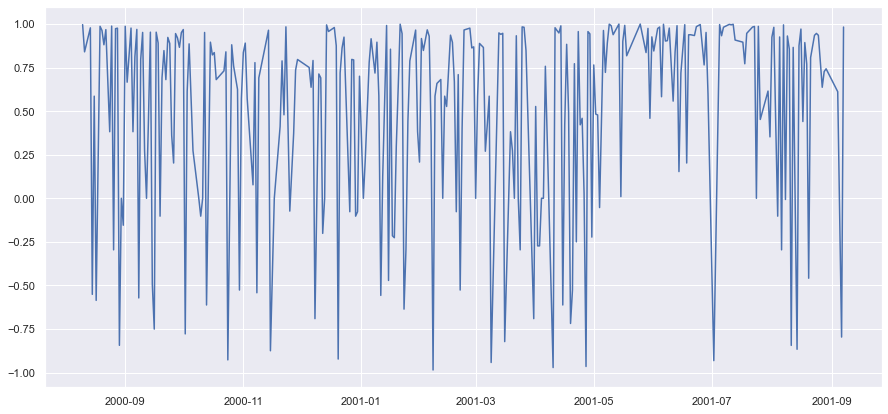

In [164]:
plt.figure(figsize=(15,7))
plt.plot(blogger_1270648['date'][:300], blogger_1270648['polarity_compound_post'][:300]);

In [165]:
np.mean(blogger_1270648['polarity_compound_post'])

0.511602066772655

In [166]:
my_ts = blogger_1270648[['date', 'polarity_compound_post']]

In [167]:
my_ts.set_index('date',inplace=True)

In [168]:
my_ts

,polarity_compound_post
date,
2000-08-10,0.9963
2000-08-11,0.8402
2000-08-14,0.9779
2000-08-15,-0.5514
2000-08-16,0.5859
...,...
2004-06-30,0.9983
2004-07-17,0.9531
2004-07-19,0.9545


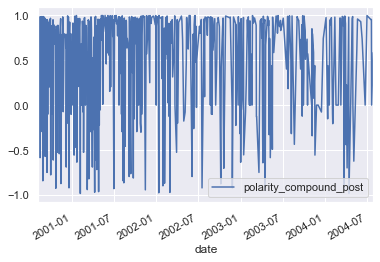

In [169]:
annual_temp = my_ts.resample('A').mean()
my_ts.plot();
#annual_temp.plot();

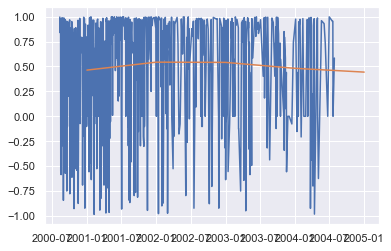

In [170]:
plt.plot(my_ts)
plt.plot(annual_temp);

In [171]:
import plotly.offline as off
import chart_studio.plotly as py
import plotly.graph_objs as go

data = [go.Scatter(x=annual_temp.index, y=annual_temp.polarity_compound_post)]
off.iplot(data)



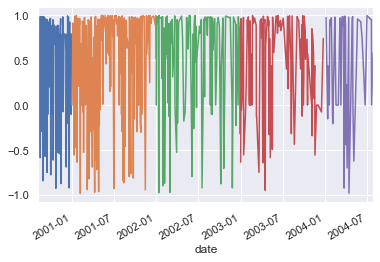

In [172]:
my_ts.resample('A').polarity_compound_post.plot();

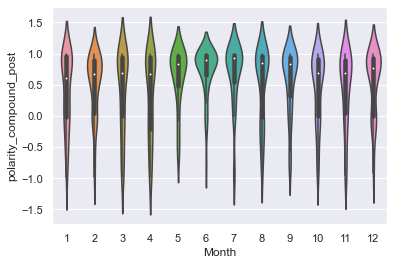

In [173]:
# violinplot months to determine variance and range
sns.set()
sns.violinplot(x=my_ts.index.month, y=my_ts.polarity_compound_post)
plt.xlabel("Month")
plt.ylabel("polarity_compound_post");

In [175]:
print(my_ts.polarity_compound_post.std())
print(my_ts.polarity_compound_post.diff().std())
print(my_ts.polarity_compound_post.diff().diff().std()) # theoretically lowest, but one above is close enough
print(my_ts.polarity_compound_post.diff().diff().diff().std())

0.556530107127219
0.7886526954401606
1.3510960499012161
2.443404387886563


In [176]:
print(annual_temp.polarity_compound_post.std()) # looks stationary as is
print(annual_temp.polarity_compound_post.diff().std())
print(annual_temp.polarity_compound_post.diff().diff().std())
print(annual_temp.polarity_compound_post.diff().diff().diff().std())

0.04549005594049054
0.0612344955216498
0.05389428273815755
0.038116883919729984


In [177]:
import statsmodels.tsa.stattools as ts
def dftest(timeseries):
    dftest = ts.adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

Test Statistic          -19.037754
p-value                   0.000000
Lags Used                 1.000000
Observations Used       627.000000
Critical Value (1%)      -3.440823
Critical Value (5%)      -2.866161
Critical Value (10%)     -2.569231
dtype: float64


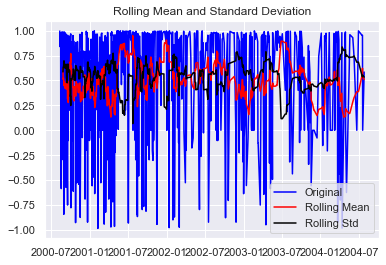

In [178]:
dftest(my_ts.polarity_compound_post) #data is stationary

In [179]:
my_ts.polarity_compound_post = my_ts.polarity_compound_post.diff()
my_ts = my_ts.iloc[1:,:]

In [180]:
#my_ts.polarity_compound_post = my_ts.polarity_compound_post.diff()
#my_ts = my_ts.iloc[1:,:]

In [181]:
#dftest(annual_temp.polarity_compound_post)

In [182]:
# define helper plot function for visualization
import statsmodels.tsa.api as smt

def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    data.plot(ax=raw, figsize=(15,8))
    smt.graphics.plot_acf(data, lags=lags, ax=acf)
    smt.graphics.plot_pacf(data, lags=lags, ax=pacf)
    sns.despine()
    plt.tight_layout()

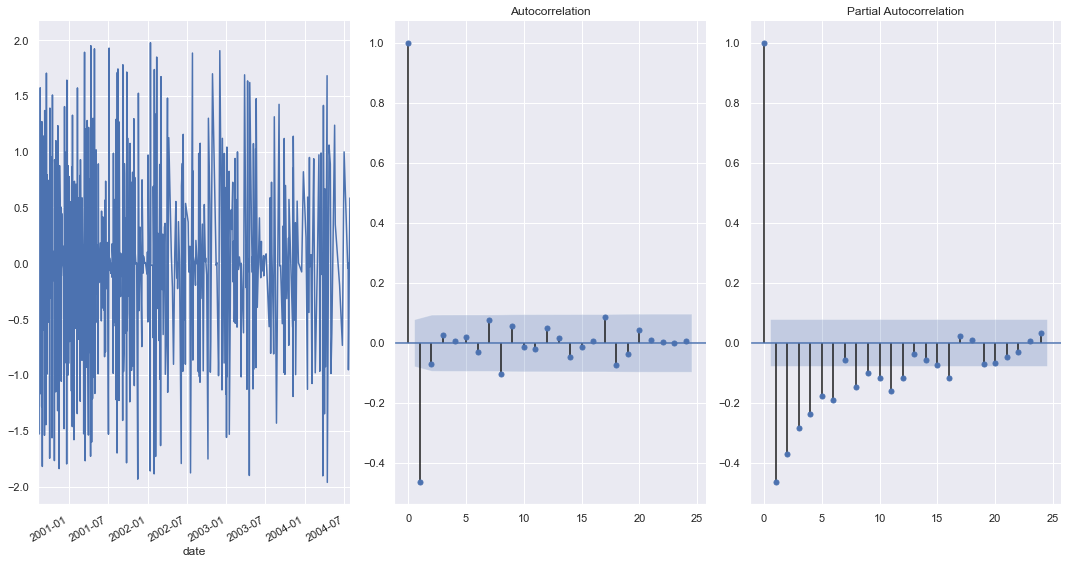

In [183]:
plots(my_ts.polarity_compound_post, lags=24);

In [184]:
# we might need to install dev version for statespace functionality
#!pip install git+https://github.com/statsmodels/statsmodels.git
import statsmodels.api as sm

# fit SARIMA monthly based on helper plots
sar = sm.tsa.statespace.SARIMAX(my_ts.polarity_compound_post, order=(3,0,0), 
                                seasonal_order=(0,0,0,0), trend='c').fit()
sar.summary()

/Users/elena/opt/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/elena/opt/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     polarity_compound_post   No. Observations:                  628
Model:                   SARIMAX(3, 0, 0)   Log Likelihood                -592.890
Date:                    Tue, 02 Jun 2020   AIC                           1195.781
Time:                            23:41:28   BIC                           1217.994
Sample:                                 0   HQIC                          1204.410
                                    - 628                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0010      0.030     -0.033      0.974      -0.061       0.059
ar.L1         -0.7413      0.041    -18.121      0.000      -0.822      -0.661
ar.L2         -0.5489      0.047    -11.627      0.000      -0.641      -0.456
ar.L3         -0.2842      0.039     -7.224      0.000      -0.361      -0.207
sigma2         0.3864      0.025     15.568      0.000       0.338       0.435
===================================================================================
Ljung-Box (Q):                      110.90   Jarque-Bera (JB):                83.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.88
Prob(H) (two-sided):                  0.50   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

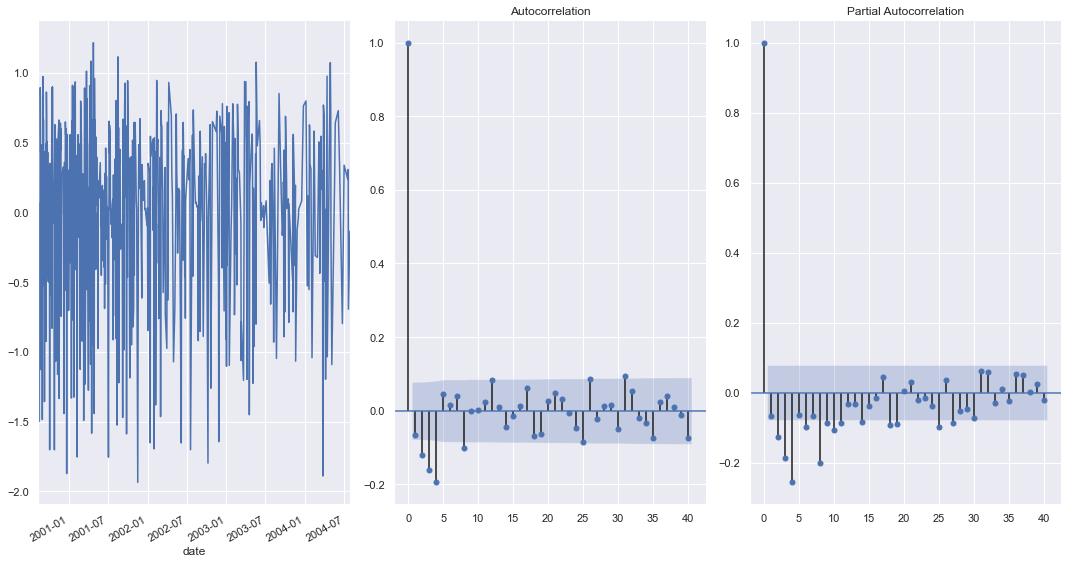

In [185]:
plots(sar.resid, lags=40);

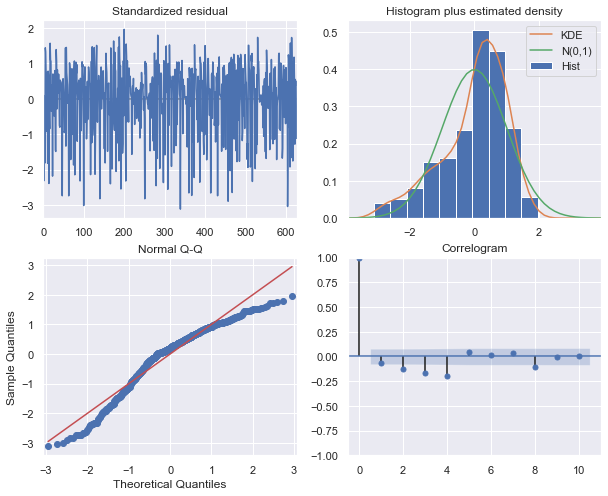

In [186]:
sar.plot_diagnostics(figsize=(10,8));

/Users/elena/opt/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2009: ValueWarning:

Dynamic prediction specified to begin after the end of prediction, and so has no effect.



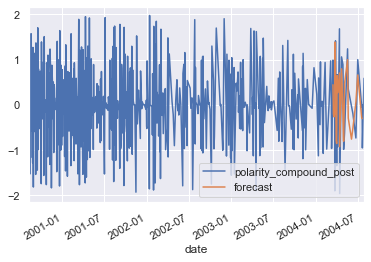

In [196]:
# plot predictions
my_ts['forecast'] = sar.predict(start = 600, end= 625, dynamic=30)  
my_ts[['polarity_compound_post', 'forecast']].plot();

# per the documentation, we start predicting at period 750, and start a dynamic forecast at 750 + 30
# this means we use our predictions as "ground truth" for following predictions

In [197]:
my_ts

,polarity_compound_post,forecast
date,,
2000-08-11,-0.1561,NaN
2000-08-14,0.1377,NaN
2000-08-15,-1.5293,NaN
2000-08-16,1.1373,NaN
2000-08-17,-1.1718,NaN
...,...,...
2004-06-30,0.9983,0.659496
2004-07-17,-0.0452,-0.282217
2004-07-19,0.0014,-0.306507


In [199]:
my_ts[600:625]

,polarity_compound_post,forecast
date,,
2004-03-15,0.9888,0.442355
2004-03-17,-0.0026,-0.201893
2004-03-19,-0.1002,-0.266914
2004-03-22,0.0937,-0.206293
2004-03-23,-1.9045,-0.014722
2004-03-24,0.5033,1.387943
2004-03-26,1.4148,0.644573
2004-03-29,-0.0851,-0.784847
2004-03-31,-1.3486,-0.857474


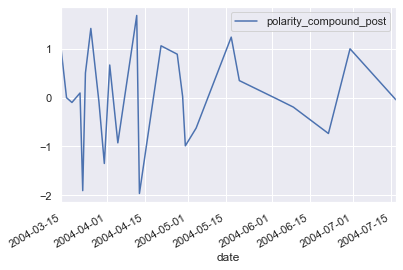

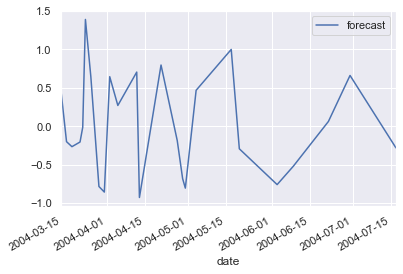

In [200]:
my_ts[600:625][['polarity_compound_post']].plot();
my_ts[600:625][['forecast']].plot();

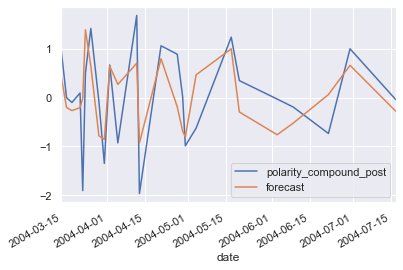

In [201]:
my_ts[600:625][['polarity_compound_post', 'forecast']].plot();

In [202]:
# create and run statistical tests on model
norm_val, norm_p, skew, kurtosis = sar.test_normality('jarquebera')[0]
lb_val, lb_p = sar.test_serial_correlation(method='ljungbox')[0]
het_val, het_p = sar.test_heteroskedasticity('breakvar')[0]
# we want to look at largest lag for Ljung-Box, so take largest number in series
# there's intelligence in the method to determine how many lags back to calculate this stat
lb_val = lb_val[-1]
lb_p = lb_p[-1]
durbin_watson = sm.stats.stattools.durbin_watson(sar.filter_results.standardized_forecasts_error[0, sar.loglikelihood_burn:])

print('Normality: val={:.3f}, p={:.3f}'.format(norm_val, norm_p));
print('Ljung-Box: val={:.3f}, p={:.3f}'.format(lb_val, lb_p));
print('Heteroskedasticity: val={:.3f}, p={:.3f}'.format(het_val, het_p));
print('Durbin-Watson: d={:.2f}'.format(durbin_watson))

Normality: val=83.562, p=0.000
Ljung-Box: val=110.899, p=0.000
Heteroskedasticity: val=0.910, p=0.496
Durbin-Watson: d=2.13


# Profet

In [203]:
from fbprophet import Prophet

In [204]:
df_r = my_ts.iloc[:,:1].reset_index()

In [205]:
df_r.rename(columns={'date':'ds', 'polarity_compound_post':'y'}, inplace=True)

In [206]:
model_r = Prophet()
model_r.fit(df_r)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [207]:
future_r = model_r.make_future_dataframe(periods=365)
forecast_r = model_r.predict(future_r)

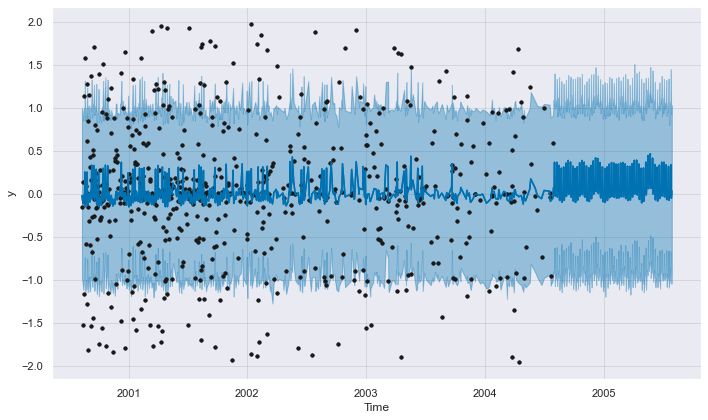

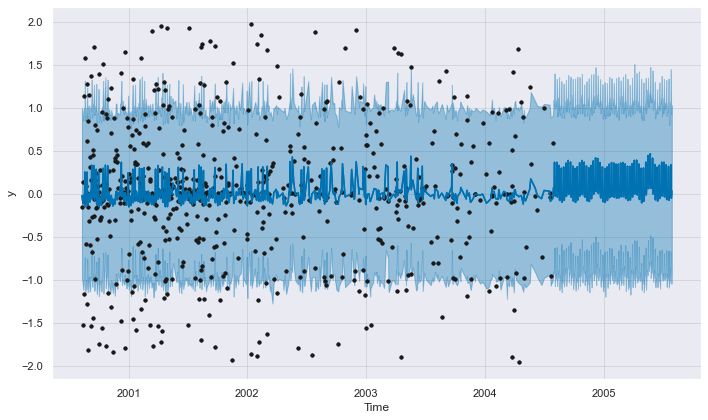

In [208]:
fig = model_r.plot(forecast_r)
model_r.plot(forecast_r, ax=fig.axes[0], xlabel='Time')

# Pyflux

In [209]:
#!pip install git+https://github.com/RJT1990/pyflux
import pyflux as pf

In [210]:
# define helper plot function for visualing ACF and PACF plots
import seaborn as sns
import statsmodels.tsa.api as smt

def plots(data, lags=None):
    
    plt.figure(figsize=(8,4))
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    data.plot(ax=raw)
    smt.graphics.plot_acf(data, lags=lags, ax=acf)
    smt.graphics.plot_pacf(data, lags=lags, ax=pacf)
    sns.despine()
    plt.tight_layout()

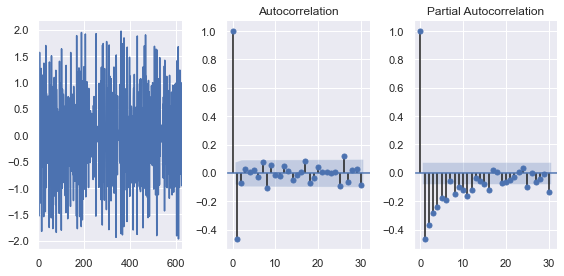

In [211]:
plots(df_r.y, lags=30)

In [212]:
# Instantiate ARIMA model, we could include additional features in the "formula" parameter if we had them
model = pf.ARIMAX(data=df_r,formula='y~1',ar=2,ma=0, integ=1)
fit_model = model.fit()
fit_model.summary()

Normal ARIMAX(2,1,0)                                                                                      
======================================================= ==================================================
Dependent Variable: Differenced y                       Method: MLE                                       
Start Date: 2                                           Log Likelihood: -821.3259                         
End Date: 627                                           AIC: 1650.6519                                    
Number of observations: 625                             BIC: 1668.4029                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    -0.9547    0.0345     -27.6858 0.0      (-1.0223 | -0.8871)      
AR(2)                                

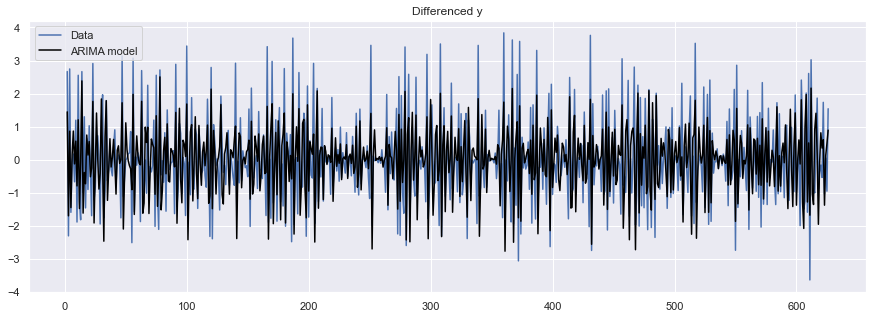

In [213]:
# Plot the model results
model.plot_fit(figsize=(15,5))

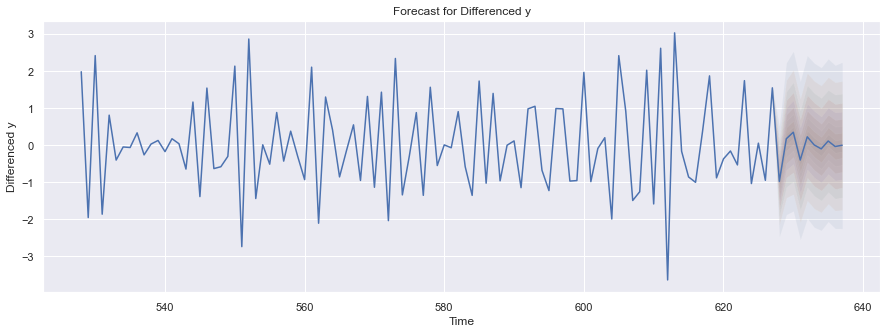

In [214]:
# Forecast going forward!
model.plot_predict(h=10,oos_data=df_r.iloc[-12:],past_values=100,figsize=(15,5))